In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets.mnist as mnist
from tqdm import tqdm

Train dataset shape: (60000, 784), train label shape: (60000,)
Test dataset shape: (10000, 784), test label shape: (10000,)
Pixel value range: 0.0 - 1.0


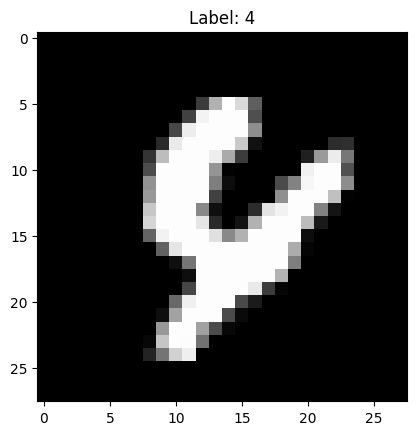

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train.reshape(X_train.shape[0], -1)/255.0, X_test.reshape(X_test.shape[0], -1)/255.0 # Scaling the dataset
print(f"Train dataset shape: {X_train.shape}, train label shape: {y_train.shape}")
print(f"Test dataset shape: {X_test.shape}, test label shape: {y_test.shape}")

print(f"Pixel value range: {np.min([np.min(X_train), np.min(X_test)])} - {np.max([np.max(X_train), np.max(X_test)])}")

plt.figure()
i = np.random.randint(0, len(X_train))
plt.title("Label: " + str(y_train[i]))
plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
plt.show()

In [92]:
clusters = 10
weights = np.random.randn(X_train.shape[-1], clusters)
alpha = 0.001
epochs = 500
batch_size = 32

for _ in tqdm(range(epochs)):
# for _ in range(epochs):
    # Shuffle the training data
    idx = np.random.permutation(len(X_train))
    x =  X_train.copy()[idx, :]
    
    for j in range(0, x.shape[0], batch_size):
        # Get the batch of data
        x_batch = x[j:j+batch_size, :]
        
        # Set initial min distance to first cluster
        min_cluster = np.zeros((x_batch.shape[0],), dtype=np.int64)
        distance_min = np.sqrt(np.sum(np.square(x_batch - weights[:, 0]), axis=1))
        
        for i in range(1, clusters):
            # Calculate distance for current cluster
            distance = np.sqrt(np.sum(np.square(x_batch -weights[:, i]), axis=1))
            current_cluster = np.ones((x_batch.shape[0],), dtype=np.int64) * i
            
            # Stack the min distance and current distance to get the minimum distance for each sample in batch
            stacked_distances = np.stack((distance_min, distance))
            min_indices = np.argmin(stacked_distances, axis=0)
            
            # Fetch the cluster with min distance for each sample in batch
            min_cluster = np.stack((min_cluster, current_cluster))[min_indices, range(min_indices.size)]
#             print(min_cluster)
            
            # Fetch min distance of the cluster for each sample in the batch
            distance_min = stacked_distances[min_indices, range(min_indices.size)]
        
            
        # Update the weight of cluster of min distance for each batch
#         print(weights.shape)
#         print(min_clusters)
        for i in range(min_cluster.size):
            weights[:, min_cluster[i]] = weights[:, min_cluster[i]] + alpha * (x_batch[i, :] - weights[:, min_cluster[i]])
            if min_cluster[i] - 1 >= 0:
                weights[:, min_cluster[i]-1] = weights[:, min_cluster[i]-1] + alpha * (x_batch[i, :] - weights[:, min_cluster[i]-1])
            if min_cluster[i] + 1 < weights.shape[-1]:
                weights[:, min_cluster[i]+1] = weights[:, min_cluster[i]+1] + alpha * (x_batch[i, :] - weights[:, min_cluster[i]+1])
        
    


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [23:30<00:00,  2.82s/it]


In [80]:
clusters = 3
weights = np.random.randn(X_train.shape[-1], clusters)
alpha = 0.001
epochs = 100
batch_size = 60_000

for _ in tqdm(range(epochs)):
# for _ in range(epochs):
    # Shuffle the training data
    idx = np.random.permutation(len(X_train))
    x =  X_train.copy()[idx, :]
    
    for j in range(0, x.shape[0], batch_size):
        # Get the batch of data
        x_batch = x[j:j+batch_size, :]
        
        for i in range(x_batch.shape[0]):
            min_cluster = 0
            min_distance = np.sqrt(np.sum(np.square(x_batch[i] - weights[:, 0])))
            
            for k in range(1, clusters):
                distance = np.sqrt(np.sum(np.square(x_batch[i] - weights[:, k])))
                if distance < min_distance:
                    min_distance = distance
                    min_cluster = k
                    
            weights[:, min_cluster] = weights[:, min_cluster] + alpha * (x_batch[i] - weights[:, min_cluster])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:43<00:00,  2.23s/it]


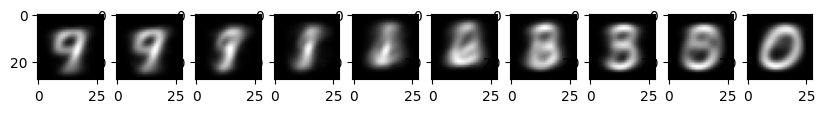

In [93]:
plt.figure(figsize=(10, 2))
for i in range(clusters):
    plt.subplot(1, clusters, i+1)
    plt.imshow(weights[:, i].reshape(28, 28), cmap='gray')
plt.show()

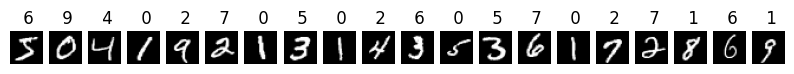

In [90]:
# Plot some example predictions
n_examples = 20
indices = np.random.choice(len(X_train), n_examples)
plt.figure(figsize=(10, 10))
for i in range(n_examples):
    img = X_train[i, :]
    min_cluster = 0
    min_distance = np.sqrt(np.sum(np.square(img - weights[:, 0])))

    for k in range(1, clusters):
        distance = np.sqrt(np.sum(np.square(img - weights[:, k])))
        if distance < min_distance:
            min_distance = distance
            min_cluster = k


    plt.subplot(1, n_examples, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f' {min_cluster}')
plt.show()



In [53]:
a = np.array([
    [1, 2],
    [3, 4]
])
b = np.array([1, 3])
c = np.array([2, 5])
db = np.sum(np.square(a - b), axis=1)
cb = np.array([1, 2])
dc = np.sum(np.square(a - c), axis=1)
cc = np.array([0, 3])
print(db, dc)
m = np.argmin(np.stack((db, dc)), axis=0)
print(m)
print(np.stack((cb, cc))[range(m.size), m])
print(np.stack((db, dc))[range(m.size), m])

a[:, 0] = a[:, 0]

[1 5] [10  2]
[0 1]
[1 3]
[1 2]
